In [17]:
from manim import *
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.datasets as data
from sklearn.cluster import DBSCAN
import hdbscan
from matplotlib import collections

In [13]:
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.5, 's' : 10, 'linewidths':0}

In [11]:
import os
os.getcwd()

'c:\\Users\\hrush\\OneDrive - iitgn.ac.in\\Desktop\\Projects\\Presentation\\notebooks'

In [18]:
data_point = np.load(r'..\data\clusterable_data.npy')


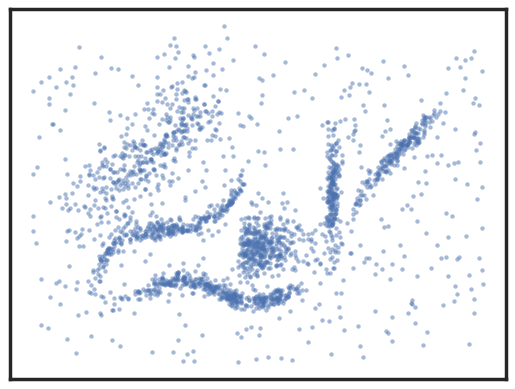

In [13]:
plt.scatter(data[:,0], data[:,1], color='b', **plot_kwds)
plt.xticks([])
plt.yticks([])
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

# Tests

In [ ]:
def plot_clusters(data, algorithm, args, kwds):
    
    # Getting Lables
    labels = algorithm(*args, **kwds).fit_predict(data)
    
    # Set Colors
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    
    plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)
    plt.text(-0.5, 0.8, f'Eps: {kwds["eps"]}', fontsize=14)
    plt.show()

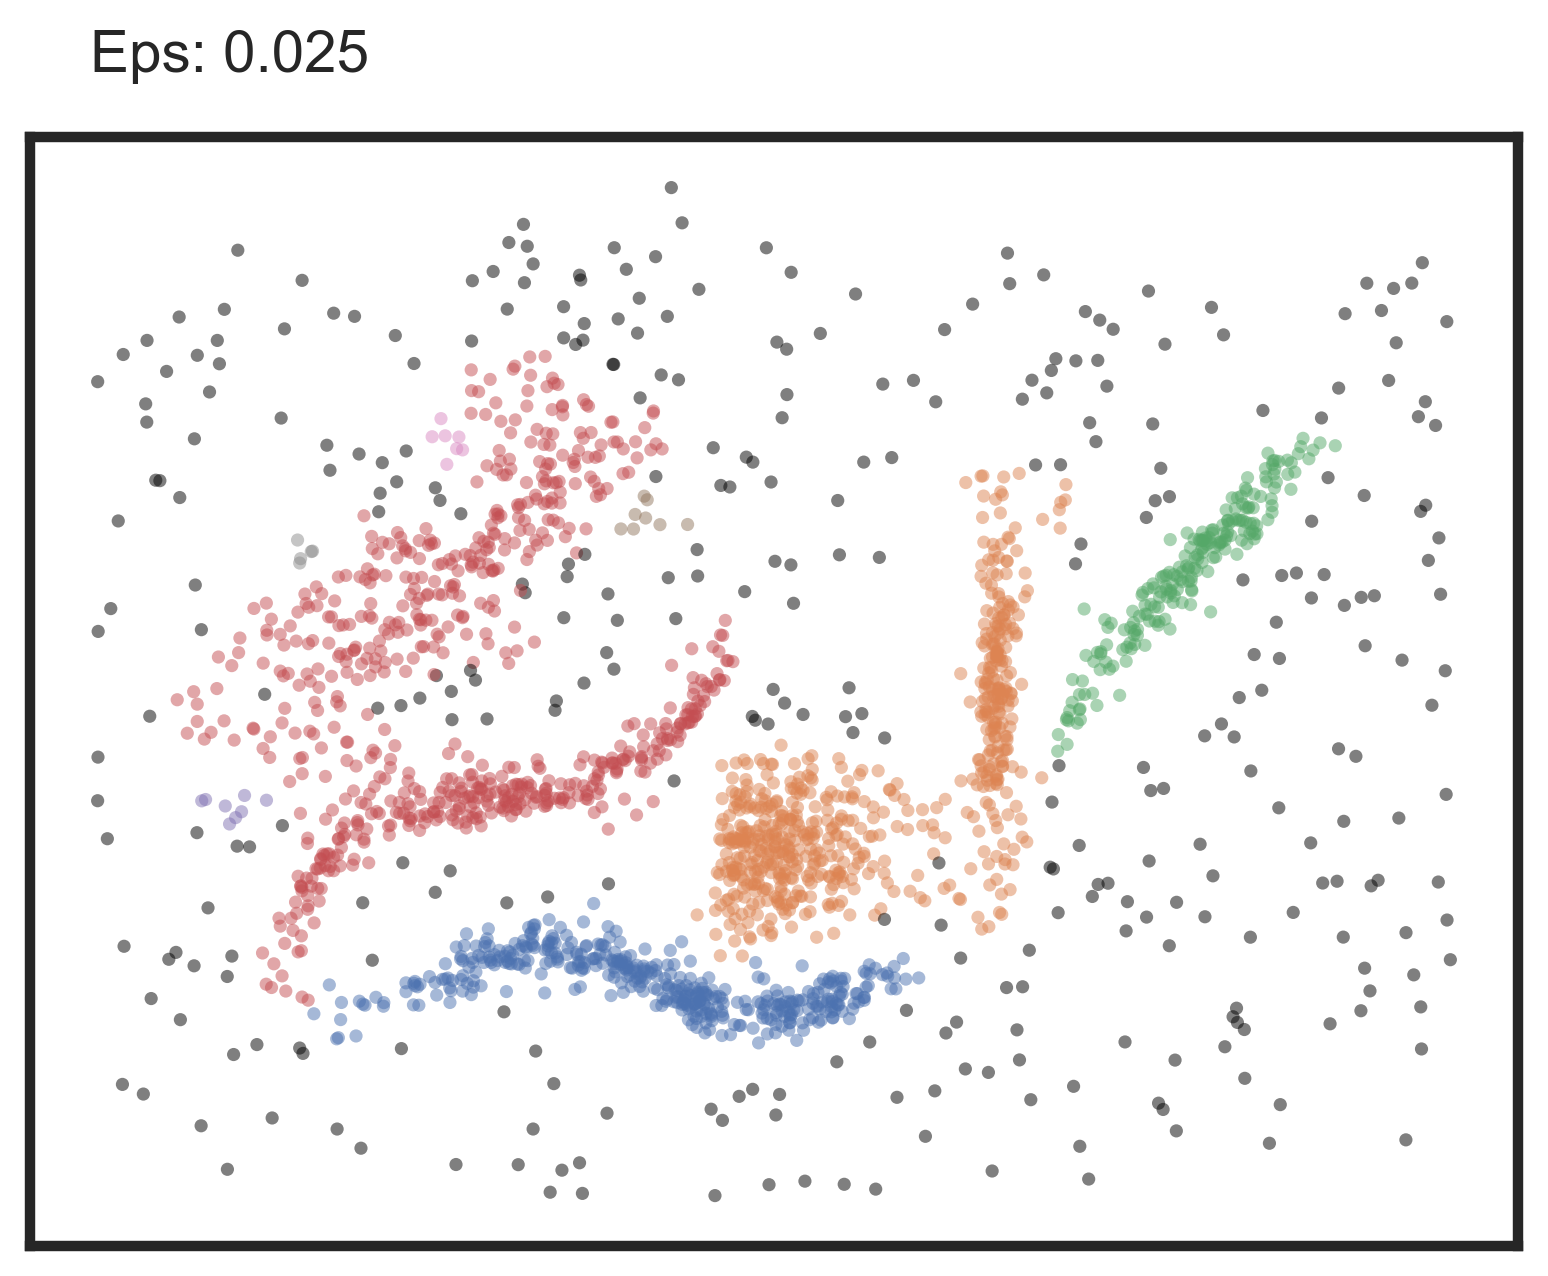

In [17]:
plot_clusters(data, DBSCAN, (), {'eps':0.025})

In [14]:

param   = "-v WARNING -s -ql --disable_caching --progress_bar leave Example"
paramH  = "-v WARNING -s -qh --disable_caching --progress_bar leave Example"
paramp  = "-v WARNING    -ql --disable_caching --progress_bar leave Example"
parampH = "-v WARNING    -qh --disable_caching --progress_bar leave Example"

In [15]:
%%manim $paramp
config.frame_width = 28
config.frame_height = 15

plt.rcParams['figure.dpi'] = 300

def plot_clusters(data, algorithm, args, kwds):
    
    # Getting Lables
    labels = algorithm(*args, **kwds).fit_predict(data)

    # Settings
    sns.set_context('poster')
    sns.set_style('white')
    sns.set_color_codes()
    plot_kwds = {'alpha' : 0.5, 's' : 10, 'linewidths':0}
    
    # Set Colors
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]

    # Ploting
    fig = plt.figure(figsize=(5, 4))
    ax = fig.add_subplot()
    ax.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)

    # Print Eps value
    plt.text(-0.5, 0.8, f'Eps: {kwds["eps"]:.3f}', fontsize=14)

    # Remove ticks
    plt.xticks([])
    plt.yticks([])
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

    # Limit the plot
    # plt.xlim(-0.1, 0.1)
    # plt.ylim(-0.1, 0.1)

    # Draw fig
    fig.canvas.draw()

    # Create buffer
    buf = fig.canvas.buffer_rgba()
    img = ImageMobject(fig.canvas.buffer_rgba()).scale(1)
    plt.close(fig)
    return img

class Example(Scene):
    def construct(self):
        self.camera.background_color=WHITE
        eps_min = 0.01
        eps = 0.001
        eps_max = 0.03

        tr_eps = ValueTracker(eps)
        image = plot_clusters(data, DBSCAN, (), {'eps':eps})

        self.add(image)

        def update_image(mob):
            new_mob = plot_clusters(data, DBSCAN, (), {'eps':tr_eps.get_value()})
            mob.become(new_mob)

        image.add_updater(update_image)
        self.play(tr_eps.animate.set_value(eps_max), run_time=10, rate_func=rate_functions.linear)
        self.play(tr_eps.animate.set_value(eps_min), run_time=10, rate_func=rate_functions.double_smooth)


Animation 1: _MethodAnimation(ValueTracker): 100%|##########| 150/150 [00:35<00:00,  4.28it/s]


In [ ]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=15)
clusterer.fit(data)


lables = clusterer.labels_
# Plotting
palette = sns.color_palette('deep', np.unique(lables).max() + 1)
colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in lables]
plt.scatter(data.T[0], data.T[1], c=colors, **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [ ]:
dist_matrix = hdbscan.validity.pairwise_distances(data, metric='euclidean')
core_dist = hdbscan.validity.all_points_core_distance(dist_matrix, d=2)
mrd, crd = hdbscan.validity.all_points_mutual_reachability(data, labels=lables, cluster_id=0, d=2)

In [ ]:
fig, ax = plt.subplots()

ax.scatter(data[:200,0], data[:200,1], color='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(True)
frame.axes.get_yaxis().set_visible(True)

# for idx, radius in enumerate(core_dist):
#     cir = plt.Circle(data[idx], radius, color='r',fill=False)
#     ax.set_aspect('equal', adjustable='datalim')
#     ax.add_patch(cir)

cir = plt.Circle(data[0], 0.10219921, color='y',fill=False)
ax.set_aspect('equal', adjustable='datalim')
ax.add_patch(cir)

plt.scatter(data[0][1], data[0][1], color='g', s=0.5)
plt.scatter(data[0][1] + core_dist[0], data[0][1], color='r', s=0.5)
plt.scatter(data[0][1] - core_dist[0], data[0][1], color='r', s=0.5)
plt.scatter(data[0][1], data[0][1] + core_dist[0], color='r', s=0.5)
plt.scatter(data[0][1], data[0][1] - core_dist[0], color='r', s=0.5)
plt.scatter(data[1][1], data[1][1], color='g', s=0.5)

plt.show()

In [38]:
dist_matrix = hdbscan.validity.pairwise_distances(data, metric='euclidean')

# np.argpartition(dist_matrix[0], 6)[:6]
np.max(dist_matrix[0][np.argpartition(dist_matrix[0], 6)[:6]])

0.010442368768921411

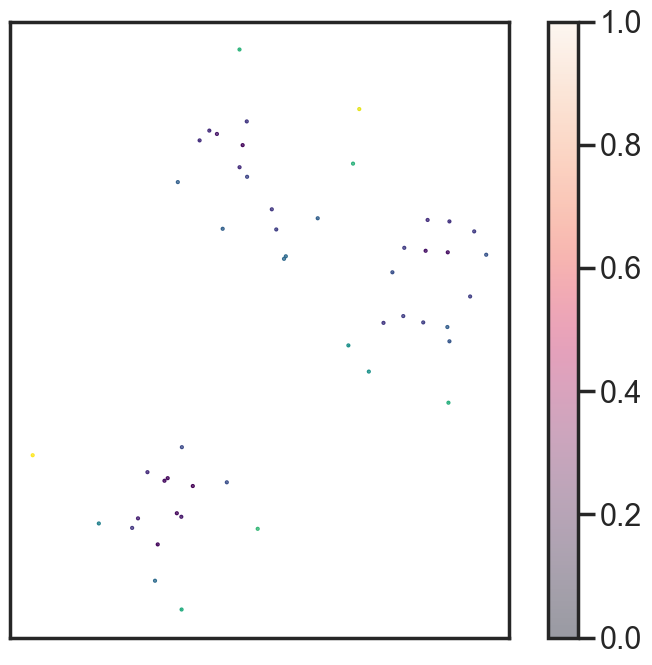

In [40]:
# Test Data
# test_data = data[:,:]
dist_matrix = hdbscan.validity.pairwise_distances(test_data, metric='euclidean')

k =5
radii = [np.max(dist_matrix[idx][np.argpartition(dist_matrix[idx], k)[:k+1]]) for idx in range(len(test_data))]

circles = [plt.Circle(pt, radius) for pt, radius in zip(test_data, radii)]

figure, axes = plt.subplots()
plt.xticks([])
plt.yticks([])
figure.set_size_inches(10, 8)

colors = 100 * np.random.rand(len(circles))
circles = collections.PatchCollection(circles, alpha=0.4)
# circles.set_array(colors)
# axes.add_collection(circles)
figure.colorbar(circles, ax=axes)
axes.scatter(test_data[:,0], test_data[:,1], c=radii, cmap='viridis', s=1)
axes.autoscale_view()

plt.gca().set_aspect('equal')
plt.show()

In [121]:
x = test_data[:, 0]
y = test_data[:, 1]

X, Y = np.meshgrid(x, y)
XY = np.column_stack((X.ravel(), Y.ravel()))
XY.shape, test_data.shape, X.shape

((400, 2), (20, 2), (20, 20))

# Images

<AxesSubplot: >

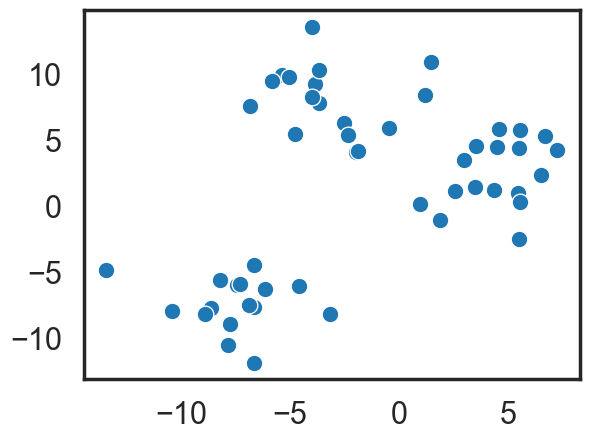

In [33]:
test_data = data.make_blobs(n_samples=50, centers=3, n_features=2, random_state=42, cluster_std=2.5)[0]
sns.scatterplot(x=test_data[:,0], y=test_data[:,1])

In [34]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
clusterer.fit(test_data)
lables = clusterer.labels_

<AxesSubplot: >

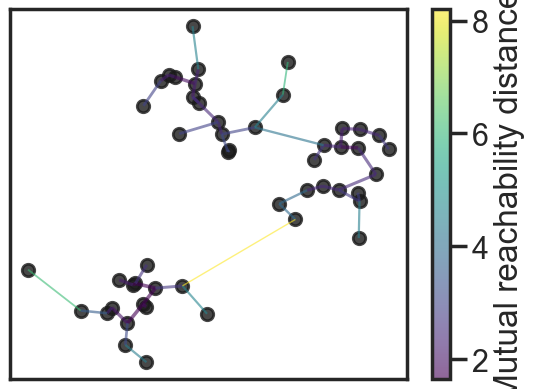

In [35]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis', 
                                      edge_alpha=0.6, 
                                      node_size=80, 
                                      edge_linewidth=1)

<AxesSubplot: ylabel='distance'>

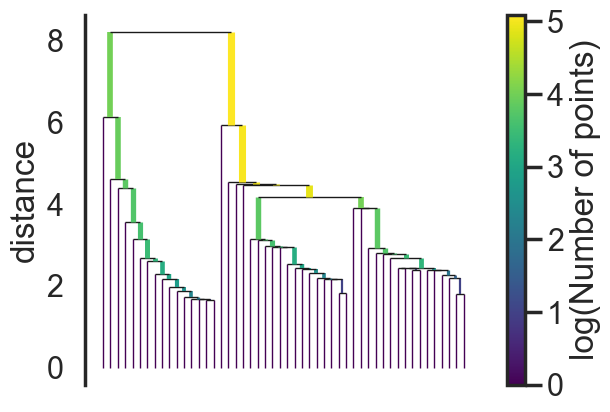

In [36]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)


<AxesSubplot: ylabel='$\\lambda$ value'>

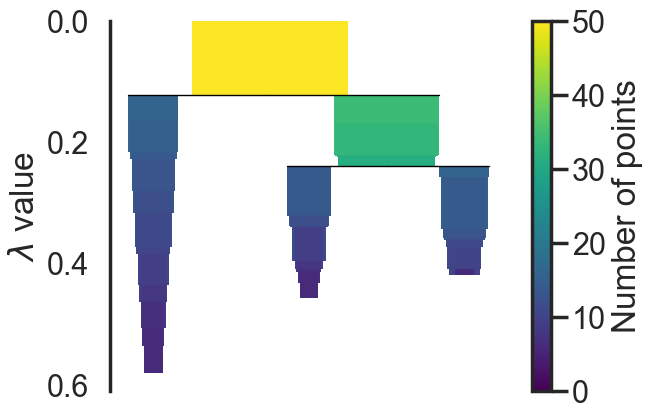

In [37]:
clusterer.condensed_tree_.plot()

<AxesSubplot: ylabel='$\\lambda$ value'>

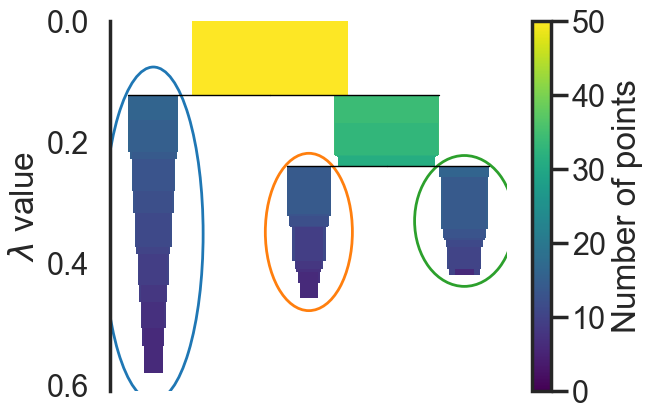

In [38]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())

([], [])

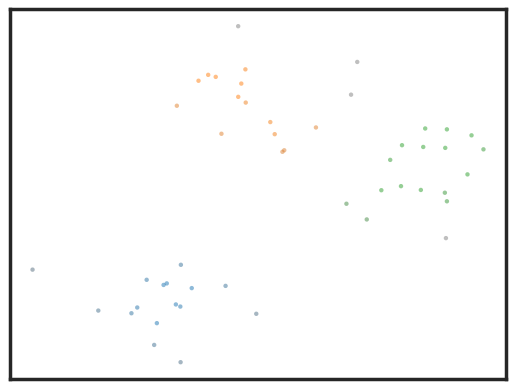

In [39]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat) 
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in 
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)
plt.xticks([])
plt.yticks([])

In [ ]:
params = "-v WARNING -ql "